# Assignment 4

Due Date:  11:59pm on Monday, December 21st (Merry Yule!)

You are definitely allowed to ask me questions as you work through these problems.

## Question 1 - RLC Filter Design

******* PLEASE READ CAREFULLY *******
In order to run PySpice, it is necessary to install the PySpice python library, as well as a C-based backend called ngspice.

If you have your own local Jupyter Notebook/Python installation, you should be able to start with the Jupyter notebook called CircuitAnalysis_AC_RLC_Bode.ipynb for each part of this question, provided that you have already installed PySpice and ngspice (as I have done on my JupyterHub server already).

If you are using Google Colaboratory, you should be able to start with the Jupyter notebook called CircuitAnalysis_AC_RLC_Bode_GoogleColab.ipynb for each part of this question.  I have modified this notebook to install PySpice and ngspice in the first cell.



(a) Design a low pass filter that has cut-off (or resonant) frequency of 100 Hz, and that has a gain of 1 at the resonant frequency.  Create a plot of the gain vs. frequency.

What is the maximum gain of this filter, and at what frequency does this maximum gain occur?

(b) Design a high pass filter that has a cut-off frequency of 1000 Hz, and that has a gain of 1 at the resonant frequency.  Create a plot of the gain vs. frequency.

(c) Another interesting type of simple filter is called a Twin-T Notch Filter:

<img src="TwinTNotch.png">

Design a twin-T notch filter with its "notch" at 60 Hz.  The notch frequency is given by:

$ f_{notch} = \frac{1}{2 \pi R C} $

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [2]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 2535@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

2020-12-21 22:42:05,673 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


Capacitor C4

In [3]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

In [4]:
resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 100.0 Hz
Factor of quality = 63.7


2020-12-21 22:42:05,877 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,878 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,889 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,891 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,897 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,898 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,907 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:05,909 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


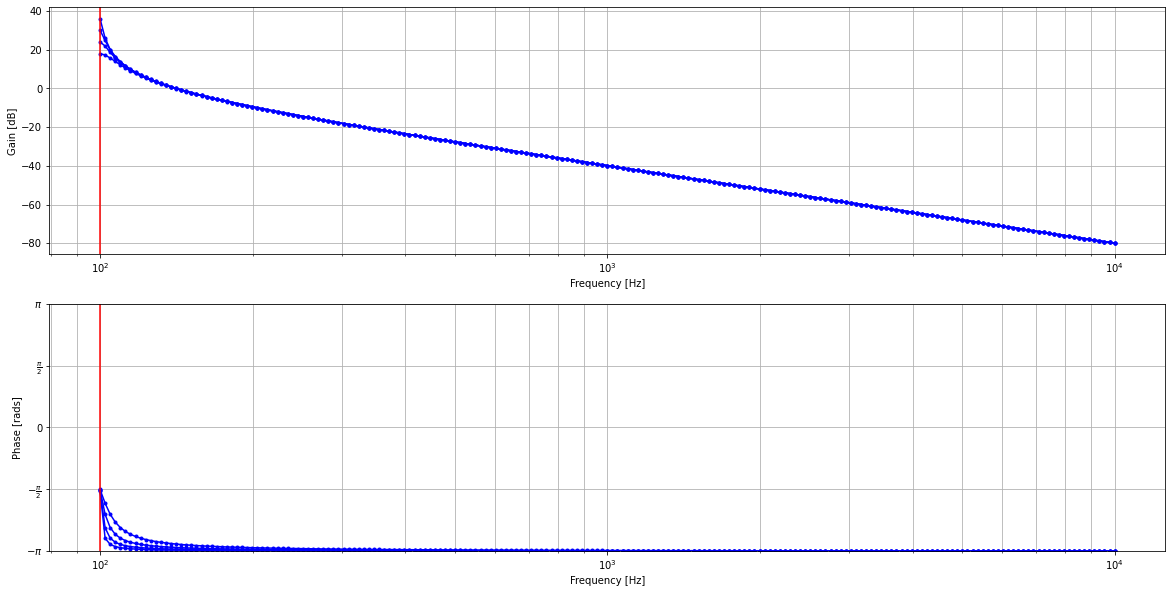

In [5]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

(a)What is the maximum gain of this filter, and at what frequency does this maximum gain occur?

The maxium gain is around 38 and occurs at 10^2 Hz frequency

In [6]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 25.33@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

2020-12-21 22:42:06,722 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


Capacitor C4

In [7]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

In [8]:
resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 1000.0 Hz
Factor of quality = 6.4


2020-12-21 22:42:06,801 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,802 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,811 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,812 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,818 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,819 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,827 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:06,828 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


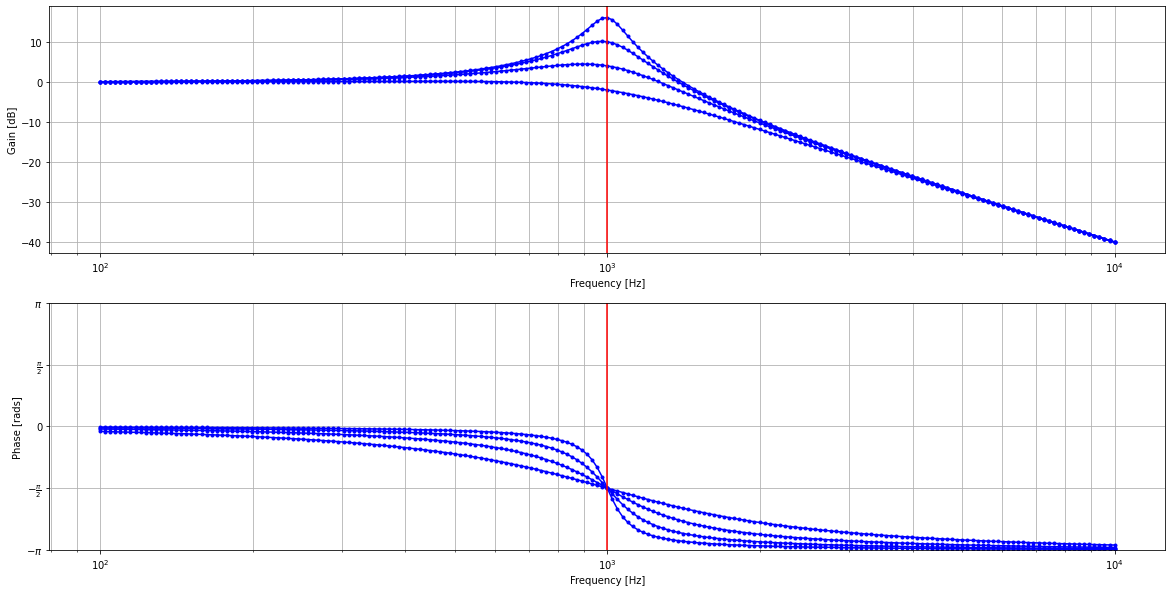

In [9]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

In [10]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 100@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

2020-12-21 22:42:07,451 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


Capacitor C4

In [11]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

In [12]:
resonant_frequency = 1 / (2 * math.pi *(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 1591549.4 Hz
Factor of quality = 12.6


2020-12-21 22:42:07,531 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,532 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,544 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,545 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,550 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,551 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,558 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-21 22:42:07,560 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


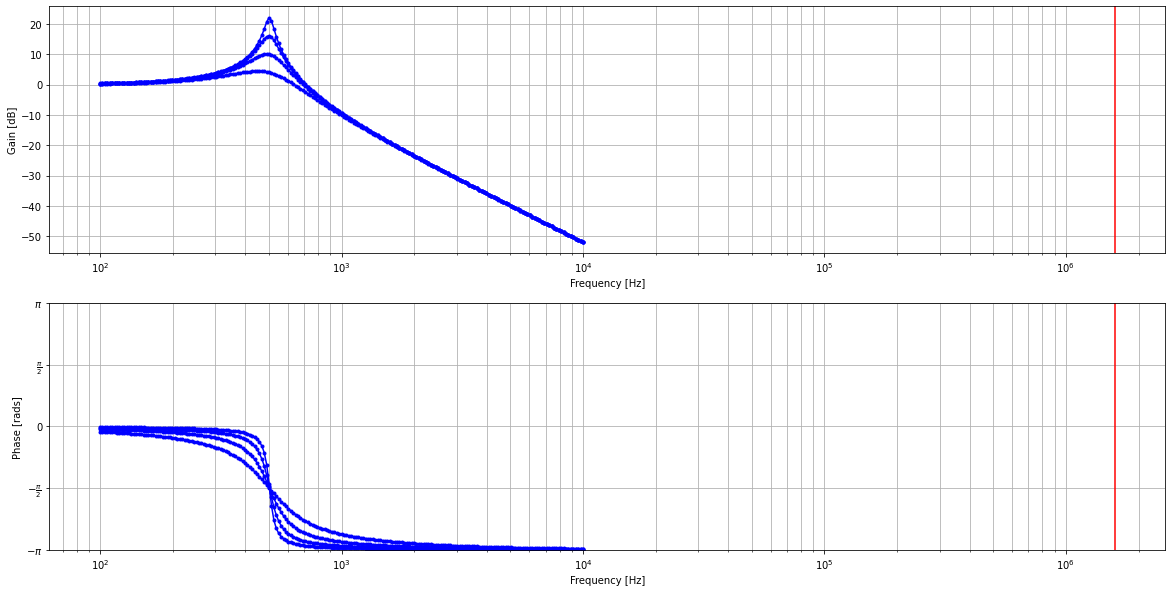

In [13]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

## Question 2 - English Premier League Football

You should be able to start with the Jupyter notebook called WebScraperGDP.ipynb for each part of this question.

The goal of this question is to investigate whether there is an upward trend in the total number of points accrued by the winning team in the annual English Premier League football season.  

In order to get the data, you can use the following code:

In [48]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from urllib.request import Request

url = Request('https://www.myfootballfacts.com/premier-league-winners/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(url)
html = webpage.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

(a) Make suitable modifications to extract the data into a pandas dataframe.  This will involve looking into the details of the BeautifulSoup object (soup) to understand the structure of the html code of the page.  This is the most involved part of this question, and is in general non-trivial.

(b) Construct a plot of total number of points per game played vs. year.  Note that in the earlier years of the EPL, teams played more games, and so points per game played is the appropriate variable.

(c) Carry out a linear regression fit to the data plotted in part (b) to determine if there is a statistically significant trend.  You should be able to use the linear regression fitting code that we developed for other assignments/in-class notebooks.

In [49]:
soup.find_all("img")

[<img alt="My Football Facts" class="logo-img" src="https://www.myfootballfacts.com/wp-content/themes/mff/assets/img/logo.png"/>,
 <img alt="List of Premier League Winners" class="attachment-sydney-large-thumb size-sydney-large-thumb wp-post-image" height="245" loading="lazy" sizes="(max-width: 350px) 100vw, 350px" src="https://www.myfootballfacts.com/wp-content/uploads/2020/01/6ecc0967c89f21faa873d549f3c82312.png" srcset="https://www.myfootballfacts.com/wp-content/uploads/2020/01/6ecc0967c89f21faa873d549f3c82312.png 350w, https://www.myfootballfacts.com/wp-content/uploads/2020/01/6ecc0967c89f21faa873d549f3c82312-300x210.png 300w" width="350"> </img>,
 <img alt="Manchester United Results" class="aligncenter size-full wp-image-900" height="30" loading="lazy" src="https://www.myfootballfacts.com/wp-content/uploads/2017/02/7b0ab2e81191e4281fb5799dfbc0ad69.jpg" width="38"/>,
 <img alt="Manchester United Results" class="aligncenter size-full wp-image-900" height="30" loading="lazy" src="htt

In [50]:
print (soup.title)
print (soup.title.text)

<title> Premier League Winners by Year | My Football Facts</title>
 Premier League Winners by Year | My Football Facts


In [51]:
for element in soup.find_all('table'):
    print (element.attrs)

{'id': 'wptmTbl1319', 'data-id': '1319', 'data-responsive': 'false', 'data-hidecols': 'false', 'data-type': 'html', 'data-paging': 'false', 'data-searching': 'true', 'data-ordering': 'false', 'data-scroll-x': 'true', 'data-scroll-collapse': 'true', 'data-align': 'center', 'data-colwidths': '[69,40,127,64,72,75,67,63,64,50,57,50]', 'class': ['disablePager', 'filterable']}
{'id': 'wptmTbl2606', 'data-id': '2606', 'data-responsive': 'false', 'data-hidecols': 'false', 'data-type': 'html', 'data-paging': 'false', 'data-searching': 'false', 'data-ordering': 'false', 'data-scroll-x': 'true', 'data-scroll-collapse': 'true', 'data-align': 'center', 'data-colwidths': '[40,130,54]', 'class': ['disablePager']}
{'border': '0', 'cellspacing': '0', 'cellpadding': '0', 'role': 'presentation'}


In [52]:
#
# Let's extract them from the page and store them in a new object

gdp_table = soup.find("table", attrs={"class": "wikitable"})

print (gdp_table.prettify())

AttributeError: 'NoneType' object has no attribute 'prettify'

In [53]:
gdp_table_data = gdp_table.tbody.find_all("tr")  # contains 2 rows

#print (gdp_table_data)

AttributeError: 'NoneType' object has no attribute 'tbody'

In [54]:
headings = []
for td in gdp_table_data[0].find_all("td"):
    # remove any newlines and extra spaces from left and right
    headings.append(td.b.text.replace('\n', ' ').strip())

#print(headings)

NameError: name 'gdp_table_data' is not defined

In [55]:
data = []
for table, heading in zip(gdp_table_data[1].find_all("table"), headings):
    t_headers = []
    for th in table.find_all("th"):
        t_headers.append(th.text.replace('\n', ' ').strip())
    table_data = []
    for tr in table.tbody.find_all("tr"):
        t_row = []

        for td, th in zip(tr.find_all("td"), t_headers): 
            t_row.append(td.text.replace('\n', '').strip())
        table_data.append(t_row)

    data.append(table_data)

#print (data)

NameError: name 'gdp_table_data' is not defined

In [56]:
team = []
points = []
year = []

for table in data:
    print (topic)
    # Each 3 table has headers as following

    for row in table:
        if row:
            print(row)
            team.append(row[1])
            year.append(row[0])
            points.append(row[2])
            
        
df = pd.DataFrame({'Team':country, 'Points':gdp, 'Rank':rank})

NameError: name 'country' is not defined

In [57]:
df.head(1000)

NameError: name 'df' is not defined

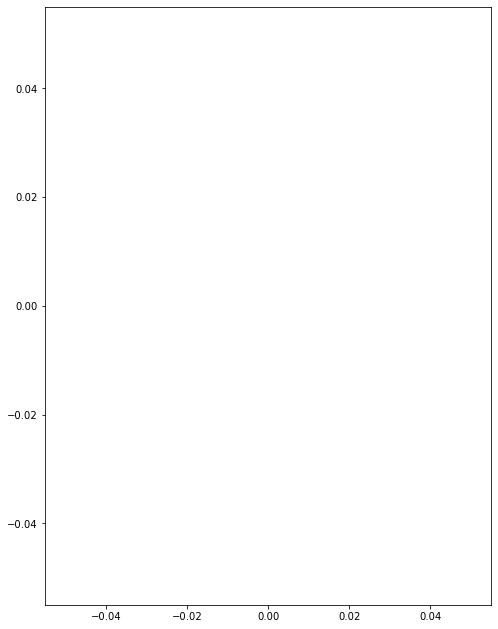

In [58]:
plt.plot(year,points)
plt.show()

In [59]:
y = df['points']
x = df['year']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

NameError: name 'df' is not defined

## Question 3 - Ideal Gas Simulation

Begin with the example Jupyter Notebook called IdealGasSimulation.ipynb  

(a) The initial Jupyter notebook is set up to run a simulation with the following parameters:  total time = 400 seconds, time step = 0.1 seconds, V = constant = 2 m$^2$, and 1000 particles in the simulation. Also, the plots are created as a 3 x 3 grid, with the 3D particle position plot taking up the upper 2 x 2 frames of this grid.  Modify the simulation so as to have the following structure:

total time = 100 seconds, time step = 0.1 seconds, V = constant = 2.0 m$^2$

Remove the plots of the individual x/y/z coordinates.  Make the plot structure a 3 row x 1 column grid, with the 3D position plot in the top panel, the velocity distribution in the middle panel, and the pressure in the bottom panel.

Run the simulation with these new parameters and setup.  Do the results for the pressure and velocity distribution make sense?

b) Modify the simulation to consider the case where the volume is NOT constant.  You should only need to change one line in the code, in the final section.  There is already a commented line in the code there that will accomplish this.

Re-run the simulation, and comment on the form of the pressure curve.

In [28]:
"""
=================
Ideal gas simulation
=================
Ideal gas simulation in a 3D system at temperature T and volume L^3,
where L is the length of the walls.
The particles that form the system only interact with the walls and 
between each other with elastic collisions, no other type of
interaction is considered (electromagnetic, gravitational...)
"""
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import types

plt.rcParams["figure.figsize"] = (8,11)

In [29]:
k_B = 1.380648e-23  # boltzmann contant (J/K)

def mod(v):
    """
        computes the squared sum over the last axis of the numpy.ndarray v
    """
    return np.sum(v * v, axis=-1)

def pmod(v, T, m):
    """
        Maxwell-Boltzmann's distribuion of probability 
        for the length of the velocity vector v at temprature T
        for a particle of mass m
    """
    return 4 * np.pi * v**2 * np.power(m / (2 * np.pi * k_B * T), 3 / 2) * np.exp(- m * v**2 / (2 * k_B * T))

In [30]:
class Simulation(animation.TimedAnimation):
    """
        Complete code for the ideal gas animation.
    """

    def __init__(self, n_particles, mass, rad, T, V, max_time, dt=0.2):
        """
            Initiallisation of parameters
            ::n_particles:: number of particles in the system
            ::mass:: of the particles (identicle for all of them)
            ::rad:: radius of the particles, notice that it must be
                    of the same order as (V/n_particles)^(1/3) in
                    order to see them colliding. If the radius is too
                    small then too few collisions would occur.
                    To remove completely the number of cillisions set the
                    radius to 0.
            ::T:: temperature of the system, this will define the initial
                    velocity of the particles
            ::V:: volume of the system, this could be a floating-point number or 
                    a function of time. If it is a number then the volume will
                    remain constant all the time, if it is a function then at each
                    iteration the volume will be update over time.
            ::max_time:: maximum animation time
        """
        
        print ("-------------------")
        print (n_particles,mass,rad,T,V,max_time,dt)
        print ("-------------------")

        self.PART = n_particles
        self.MASS = mass
        self.RAD = rad
        self.DIAM = 2 * rad

        self.T = T

        if isinstance(V, types.FunctionType):
            self.V0 = V(0)
            self.V = V
            self.Vconst = False
        else:
            self.V0 = V
            self.V = lambda t: V
            self.Vconst = True

        self.L = np.power(self.V0, 1/3) # side length
        self.halfL = self.L / 2
        self.A = 6 * self.L**2 # total surface area

        self.max_time = max_time
        self.dt = dt
        self.Nt = int(max_time / self.dt)

        self.evaluate_properties()

        # velocities histogram
        self.min_v = 0
        self.max_v = self.vmax * 3
        self.dv = 0.2 # (m/s)
        self.Nv = int((self.max_v - self.min_v) / self.dv)

        # pressure
        self.dP = 1 # (s)
        self.NP = int(max_time / self.dP)

        self.init_particles()
        self.init_figures()

        animation.TimedAnimation.__init__(self, self.fig, interval=1, blit=True, repeat=False)

    def evaluate_properties(self):
        """
            Calculates the initial properties of the system according
            to the laws of thermodynamics.
        """

        self.P = self.PART * k_B * self.T / self.V0
        self.U = 1.5 * self.PART * k_B * self.T
        self.vrms = np.sqrt(3 * k_B * self.T / self.MASS)
        self.vmax = np.sqrt(2 * k_B * self.T / self.MASS)
        self.vmed = np.sqrt(8 * k_B * self.T / (np.pi * self.MASS))

    def init_particles(self):
        """
            Initialize the particles positions and velocities.
            The initial positions are completely random inside the box.
            The initial velocities are generated by a random unitary vector with
            a length given by the average velocity (vmed) at the system temperature. 
        """
        self.r = np.random.rand(self.PART, 3) * 2.0 * (self.halfL - self.RAD) -(self.halfL - self.RAD)

        v_polar = np.random.random((self.PART, 2))

        self.v = np.zeros((self.PART, 3))

        self.v[:,0] = np.sin(v_polar[:,0] * np.pi) * np.cos(v_polar[:,1] * 2 * np.pi)
        self.v[:,1] = np.sin(v_polar[:,0] * np.pi) * np.sin(v_polar[:,1] * 2 * np.pi)
        self.v[:,2] = np.cos(v_polar[:,0] * np.pi)

        self.v *= self.vrms

    def init_figures(self):
        """
            Init the figures, axes, lines...
        """

        self.fig = plt.figure()

        self.ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2, projection='3d') # 3D axes
#        self.ax2 = plt.subplot2grid((3, 3), (2, 0)) # x-y axes
#        self.ax3 = plt.subplot2grid((3, 3), (2, 1)) # y-z axes
#        self.ax4 = plt.subplot2grid((3, 3), (2, 2)) # x-z axes
        self.ax5 = plt.subplot2grid((3, 3), (0, 2)) # velocities axes
        self.ax6 = plt.subplot2grid((3, 3), (1, 2)) # pressure axes

        # Setup ax1: 3d
        box_limits = [-self.halfL, self.halfL]
        self.ax1.set_xlim3d(box_limits)
        self.ax1.set_xlabel('X')

        self.ax1.set_ylim3d(box_limits)
        self.ax1.set_ylabel('Y')

        self.ax1.set_zlim3d(box_limits)
        self.ax1.set_zlabel('Z')

        self.line_3d = self.ax1.plot([], [], [], ls='None', marker='.')[0]
        self.line_3d_cm = self.ax1.plot([0], [0], [0], ls='None', marker='.', color='r')[0]

        # setup ax2: x-y
#         self.ax2.set_xlabel(r'x')
#         self.ax2.set_ylabel(r'y')
#         self.ax2.set_xlim(box_limits)
#         self.ax2.set_ylim(box_limits)

#         self.line_xy = self.ax2.plot([], [], ls='None', marker='.')[0]
#         self.line_xy_cm = self.ax2.plot([0], [0], ls='None', marker='.', color='r')[0]

#         # setup ax3: y-z
#         self.ax3.set_xlabel(r'y')
#         self.ax3.set_ylabel(r'z')
#         self.ax3.set_xlim(box_limits)
#         self.ax3.set_ylim(box_limits)

#         self.line_yz = self.ax3.plot([], [], ls='None', marker='.')[0]
#         self.line_yz_cm = self.ax3.plot([0], [0], ls='None', marker='.', color='r')[0]

#         # setup ax4: x-z
#         self.ax4.set_xlabel(r'x')
#         self.ax4.set_ylabel(r'z')
#         self.ax4.set_xlim(box_limits)
#         self.ax4.set_ylim(box_limits)

#         self.line_xz = self.ax4.plot([], [], ls='None', marker='.')[0]
#         self.line_xz_cm = self.ax4.plot([0], [0], ls='None', marker='.', color='r')[0]

        # setup ax5: velocities
        vs = np.linspace(0, self.vmax * 3, 100)
        self.ax5.set_xlabel(r'$v\ (m/s)$')
        self.ax5.set_ylabel(r'$N$')
        #ax5.set_ylim(0, np.ceil(self.PART * pmod(self.vmax, self.T, self.MASS) / 5))
        self.ax5.plot(vs, self.PART * pmod(vs, self.T, self.MASS) * self.dv, color='r')

        self.vel_x = np.linspace(self.min_v, self.max_v, self.Nv)
        self.vel_y = np.zeros(self.Nv)

        self.line_vel = self.ax5.plot([], [], color='b', lw=0.5)[0]

        # setup ax5: pressure
        self.ax6.set_xlabel(r'$V\ (m^3)$')
        self.ax6.set_ylabel(r'$P\ (Pa)$')
        if self.Vconst:
            pt = self.PART * k_B * self.T / self.V0
            self.ax6.plot([0,self.max_time], [pt, pt], color='r', lw=0.5)
        else:
            Vx = self.V(np.linspace(0, self.max_time, self.Nt))
            self.ax6.plot(Vx, self.PART * k_B * self.T / Vx, color='r', lw=0.5)

        self.ex_p = 0.0 # accumulated exchanged momentum with the walls
        self.last_P = -1
        self.P_x = np.zeros(self.NP)
        self.P_y = np.zeros(self.NP)

        self.line_p = self.ax6.plot([], [], color='b', lw=0.5)[0]

        self._drawn_artists = [self.line_3d, self.line_3d_cm, 
#                 self.line_xy, self.line_xy_cm,
#                 self.line_yz, self.line_yz_cm,
#                 self.line_xz, self.line_xz_cm,
                 self.line_vel, self.line_p]

    def update_volume(self, t):
        """
            Sets the new volume and changes the axes limits.
        """

        self.V0 = self.V(t)
        self.L = np.power(self.V0, 1/3)
        self.halfL = self.L / 2
        self.A = 6 * self.L**2

        box_limits = [-self.halfL, self.halfL]
        self.ax1.set_xlim3d(box_limits)
        self.ax1.set_ylim3d(box_limits)
        self.ax1.set_zlim3d(box_limits)
        self.ax2.set_xlim(box_limits)
        self.ax2.set_ylim(box_limits)
        self.ax3.set_xlim(box_limits)
        self.ax3.set_ylim(box_limits)
        self.ax4.set_xlim(box_limits)
        self.ax4.set_ylim(box_limits)

    def _draw_frame(self, t):
        self.update_volume(t)

        # update the position
        self.r += self.dt * self.v

        # check for collisions with other particles
        dists = np.sqrt(mod(self.r - self.r[:,np.newaxis]))
        cols2 = (0 < dists) & (dists < self.DIAM)
        idx_i, idx_j = np.nonzero(cols2)
        # ***possibility to simplify this *** #
        for i, j in zip(idx_i, idx_j):
            if j < i:
                # skip duplications and same particle
                continue 

            rij = self.r[i] - self.r[j]
            d = mod(rij)
            vij = self.v[i] - self.v[j]
            dv = np.dot(vij, rij) * rij / d
            self.v[i] -= dv
            self.v[j] += dv

            # update the positions so they are no longer in contact
            self.r[i] += self.dt * self.v[i]
            self.r[j] += self.dt * self.v[j]

        # check for collisions with the walls
        walls = np.nonzero(np.abs(self.r) + self.RAD > self.halfL)
        self.v[walls] *= -1
        self.r[walls] -= self.RAD * np.sign(self.r[walls])

        # calc the position of the center of masses
        CM = np.sum(self.r, axis=0) / self.PART

        # plot the new coordinates
        self.line_3d.set_data(self.r[:,0], self.r[:,1])
        self.line_3d.set_3d_properties(self.r[:,2])

        self.line_3d_cm.set_data(CM[0], CM[1])
        self.line_3d_cm.set_3d_properties(CM[2])

        self.line_xy.set_data(self.r[:,0], self.r[:,1])
        self.line_xy_cm.set_data(CM[0], CM[1])

        self.line_yz.set_data(self.r[:,1], self.r[:,2])
        self.line_yz_cm.set_data(CM[1], CM[2])

        self.line_xz.set_data(self.r[:,0], self.r[:,2])
        self.line_xz_cm.set_data(CM[0], CM[2])

        # make velocities histogram
        v_mod = np.sqrt(mod(self.v))

        for k in range(self.Nv):
            self.vel_y[k] = np.count_nonzero((k*self.dv < v_mod) & (v_mod < (k + 1)*self.dv))

        self.line_vel.set_data(self.vel_x, self.vel_y)

        # add the momentum exchanged in this iteration to the accumulated one
        self.ex_p += 2 * self.MASS * np.sum(np.abs(self.v[walls]))
        i = int(t / self.dP)
        if i > self.last_P + 1:
            # calculate the pressure after self.dP seconds

            self.last_P = i - 1

            A_avg = self.A if self.Vconst else (self.A + 6 * np.power(self.V(t - self.dP), 2/3)) / 2 

            self.P_x[self.last_P] = (t if self.Vconst else self.V0)
            self.P_y[self.last_P] = self.ex_p / (self.dP * A_avg)

            self.ex_p = 0.0

            self.line_p.set_data(self.P_x[:i], self.P_y[:i])
            self.ax6.set_ylim(np.min(self.P_y[:i]), np.max(self.P_y[:i]))

    def new_frame_seq(self):
        return iter(np.linspace(0, self.max_time, self.Nt))

    def save_data(self):
        with open('pressure.txt', 'w') as outf:
            t = np.linspace(0, self.max_time, self.NP)
            for i in range(self.NP):
                outf.write('%.5f\t%.5f\t%.5g\n' % (t[i], self.P_x[i], self.P_y[i]))

        with open('hist_vel.txt', 'w') as outf:
            for i in range(self.Nv):
                outf.write('%.5f\t%.5g\n' % (self.vel_x[i], self.vel_y[i]))

part a
-------------------
1000 1.2e-20 0.01 500 2 100 0.1
-------------------
part b
-------------------
1000 1.2e-20 0.01 500 <function <lambda> at 0x00000225C7F00040> 100 0.1
-------------------


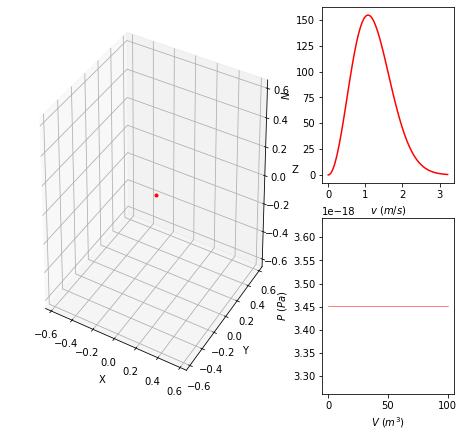

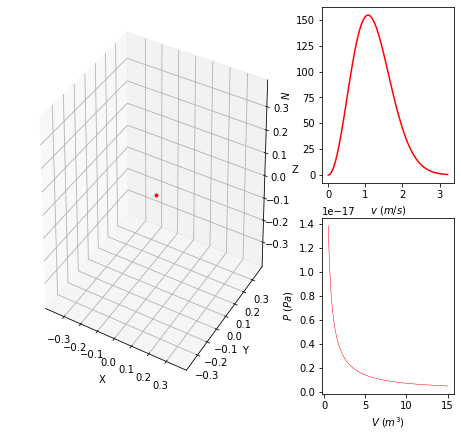

In [31]:
def V(t, V0, Vf, t_max):
    return V0 + (Vf - V0) * t / t_max

PARTICLES = 1000
MASS = 1.2e-20
RADIUS = 0.01
TEMPERATURE = 500
V0, Vf = 0.5, 15
T_MAX = 100
print("part a")
ani = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, 2, T_MAX, 0.1)
print("part b")
ani = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, lambda t: V(t, V0, Vf, T_MAX), T_MAX, 0.1)
#ani.save('test_sub.mp4', writer='imagemagick', fps=5)
#ani.save('test_sub.mp4', fps=30)
plt.show()
ani.save_data()